## Granger Causality

Given two sets of time series data, x and y, granger-causality is a method which attempts to determine whether one series is likely to influence change in the other. 
- This is accomplished by taking different lags of one series and using that to model the change in the second series.

## Problem statement

This data is from U.S. Department of Agriculture. The dataset has the following attributes:
  
- Year : The Year in which data point has been collected. It consists of two time series from 1930 to 1983.
- chicken : Polulation of the chicken across US in a year.
- egg : Egg Produciton in the same year. 

#### Read the Data

In [1]:
chickegg <- read.csv("chickegg.csv")

#### Understand the data

In [2]:
str(chickegg)
summary(chickegg)

'data.frame':	54 obs. of  3 variables:
 $ Year   : int  1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 ...
 $ chicken: int  468491 449743 436815 444523 433937 389958 403446 423921 389624 418591 ...
 $ egg    : int  3581 3532 3327 3255 3156 3081 3166 3443 3424 3561 ...


      Year         chicken            egg      
 Min.   :1930   Min.   :364584   Min.   :3081  
 1st Qu.:1943   1st Qu.:387658   1st Qu.:5008  
 Median :1956   Median :403818   Median :5380  
 Mean   :1956   Mean   :419504   Mean   :4986  
 3rd Qu.:1970   3rd Qu.:433773   3rd Qu.:5530  
 Max.   :1983   Max.   :582197   Max.   :5836  

### Make series stationary

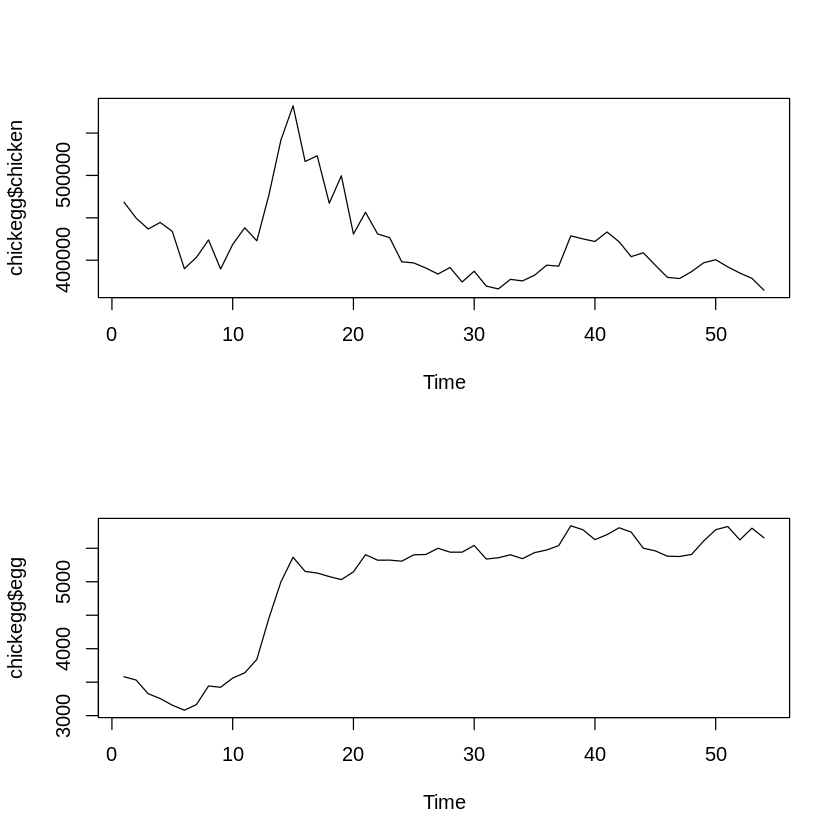

In [3]:
par(mfrow = c(2,1))

plot.ts(chickegg$chicken)
plot.ts(chickegg$egg)

- The plots provide little information other than the data is likely not stationary.

### Check number of difference is required to make the data stationary. 

In [4]:
library(forecast)

ndiffs(chickegg$chicken)
ndiffs(chickegg$egg)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] 1

[1] 1

### Get the differenced time series

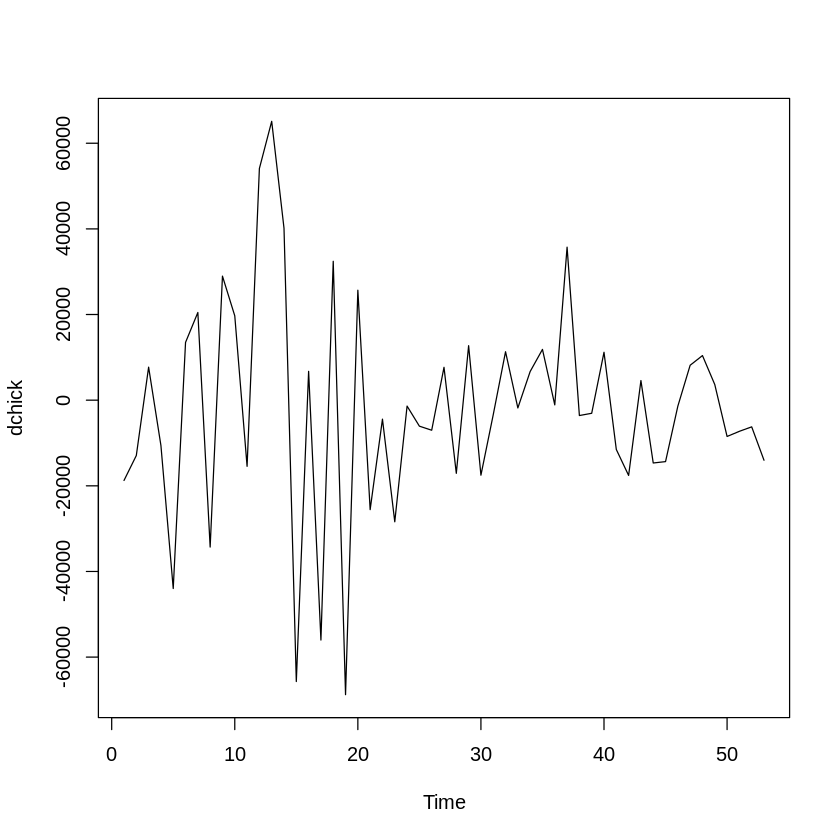

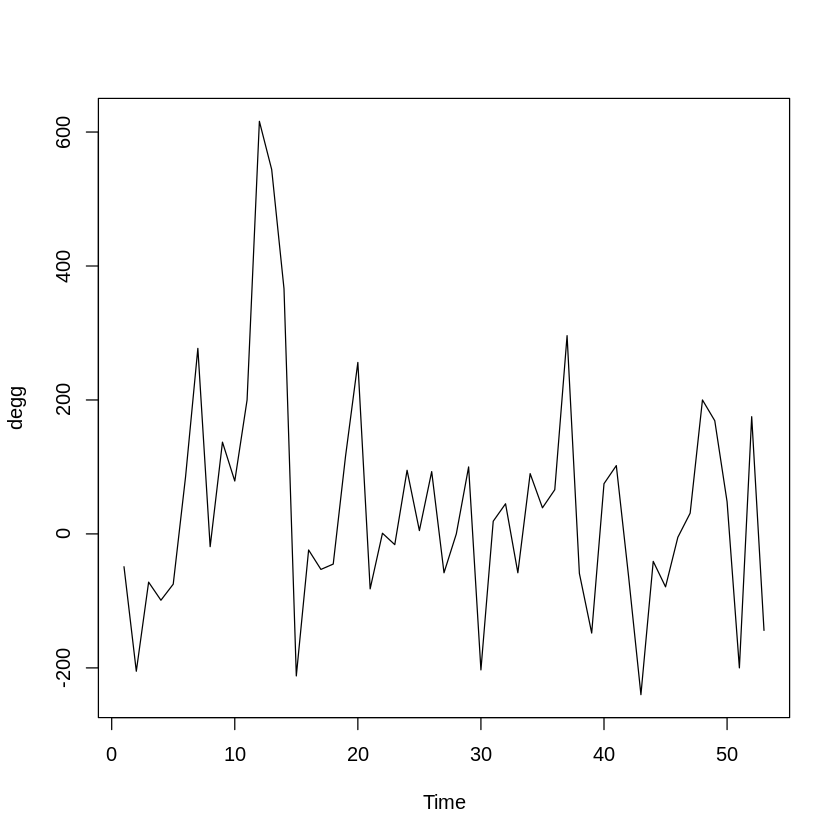

In [5]:
dchick <- diff(chickegg$chicken)
degg <- diff(chickegg$egg)

plot.ts(dchick)
plot.ts(degg)

### Test the granger Causility

There are several ways to find the optimal lag but lets consider 4th lag as of now. 
- Do eggs granger cause chickens?
    - H0: eggs does not granger-cause chicken
    - H1: eggs granger-cause chicken

In [6]:
library(lmtest)

grangertest(dchick ~ degg, order = 4)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,40,NA,NA,NA
2,44,-4,4.17622,0.006413988


#### p value is very low "0.006414", it means eggs are granger causing chicken. 


- Do chickens granger cause eggs, at lag 4?
    - H0: chicken does not granger-cause eggs
    - H1: chicken granger-cause eggs

In [7]:
grangertest(degg ~ dchick, order=4)

,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,40,NA,NA,NA
2,44,-4,0.2816616,0.8881254


#### p value is considerably high thus chickens does not granger cause eggs.

## Problem Statement 2

The dataset has the following attributes :
  
- X : The Quater in which data point has been collected. It consists of two time series date ranging from 1960 to 2016.
- realGDP: GDP data of US in the same quater
- SP500: SP 500 index in the same quater. 

#### Read the Data

In [8]:
data <- read.csv("GDPandSP500.csv")

#### Understand the data

In [9]:
str(data)
summary(data)

'data.frame':	225 obs. of  3 variables:
 $ X      : chr  "1960 Q4" "1961 Q1" "1961 Q2" "1961 Q3" ...
 $ realGDP: num  3081 3102 3160 3213 3278 ...
 $ SP500  : num  16.7 16.8 16.8 16.8 16.9 ...


      X                realGDP          SP500       
 Length:225         Min.   : 3081   Min.   : 16.71  
 Class :character   1st Qu.: 5421   1st Qu.: 28.48  
 Mode  :character   Median : 8611   Median : 59.93  
                    Mean   : 9179   Mean   : 58.14  
                    3rd Qu.:12964   3rd Qu.: 81.65  
                    Max.   :16851   Max.   :106.72  

### Make series stationary

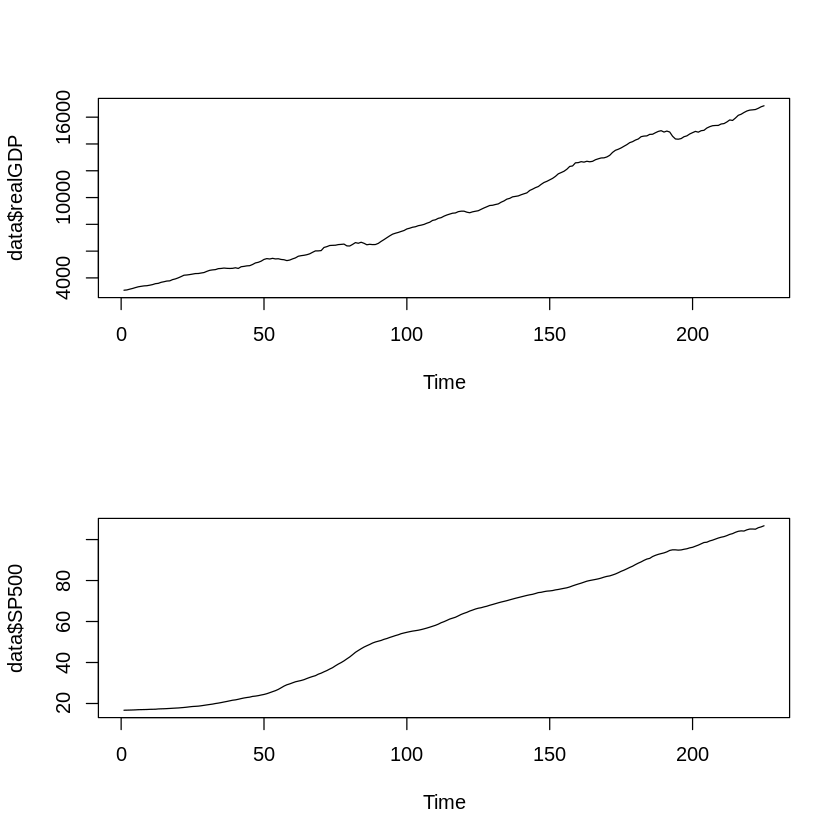

In [10]:
par(mfrow = c(2,1))

plot.ts(data$realGDP)
plot.ts(data$SP500)

- The plots provide little information other than the data is likely not stationary.

### Check number of difference is required to make the data stationary. 

In [11]:
library(forecast)

ndiffs(data$realGDP)
ndiffs(data$SP500)

[1] 2

[1] 2

### Get the differenced time series

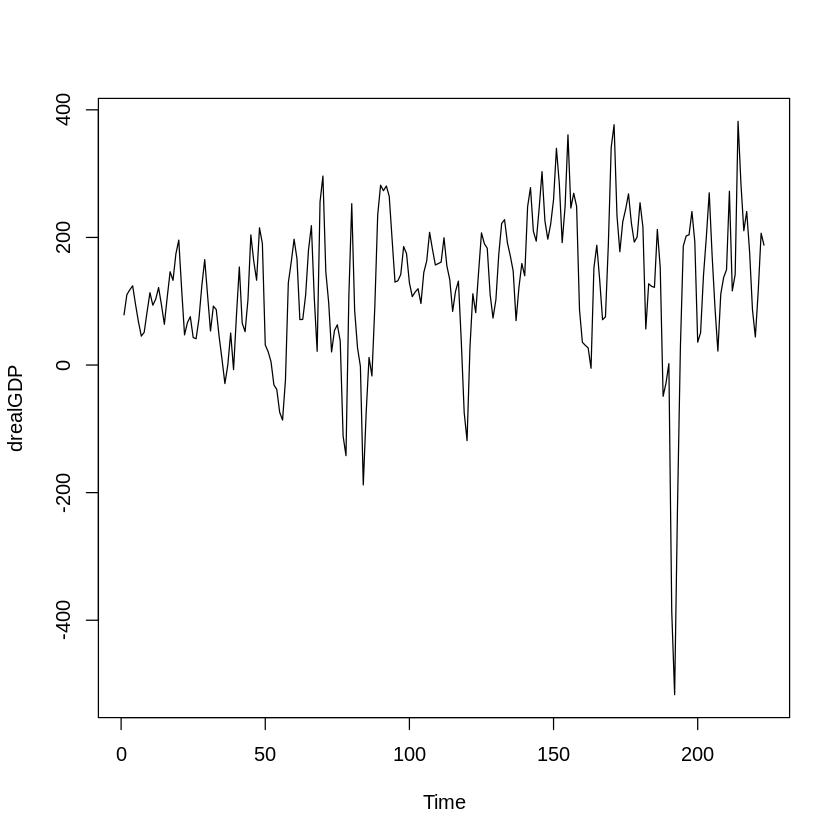

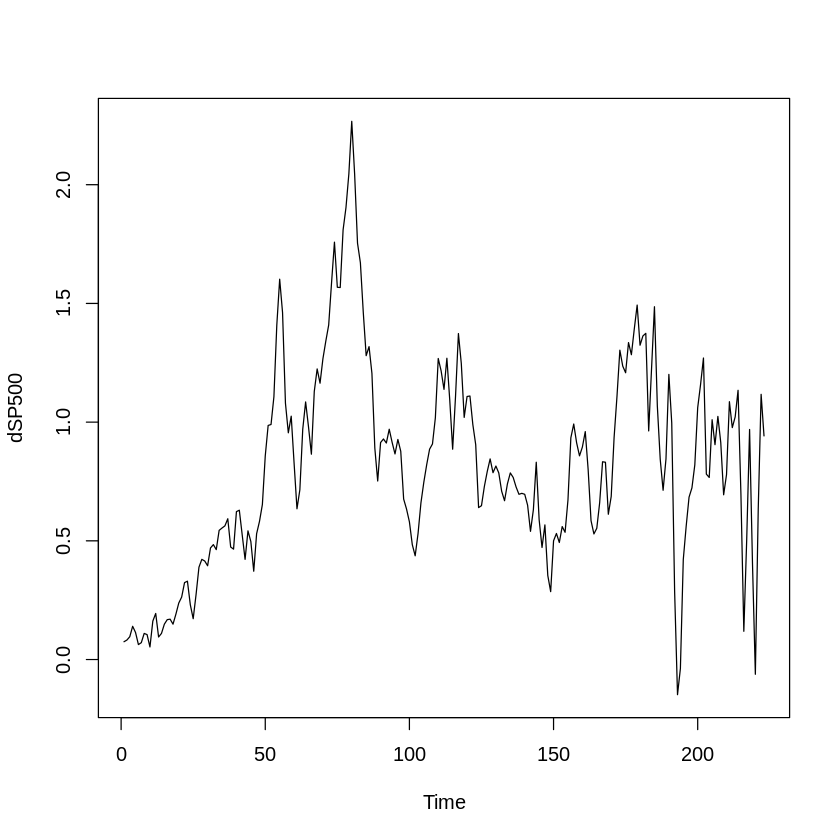

In [12]:
drealGDP <- diff(data$realGDP, lag = 2)
dSP500 <- diff(data$SP500, lag = 2)

plot.ts(drealGDP)
plot.ts(dSP500)

### Test the granger Causility

- Does GDP granger causes SP500?
    - H0: GDP does not granger-cause SP500.
    - H1: GDP granger-cause SP500. 

In [13]:
library(lmtest)

grangertest(dSP500 ~ drealGDP, order = 2)

,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,216,NA,NA,NA
2,218,-2,2.231664,0.1098192


#### p value is high "0.1098", it means GDP does not granger causing SP500. 